Bài 1: thực hiện 1 RNN với data set đơn giản, dự đoán số hành khách theo tháng

https://medium.com/analytics-vidhya/rnn-vs-gru-vs-lstm-863b0b7b1573 

In [105]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM,GRU,SimpleRNN
from sklearn.preprocessing import MinMaxScaler

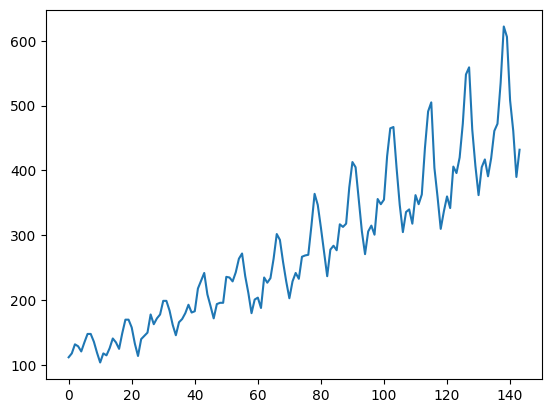

In [106]:
df = pd.read_csv("./data/airline-passengers.csv")
df.head()
df.drop(['month'],axis=1,inplace=True)
dataset = np.array(df)
dataset.reshape(-1,1)
plt.plot(dataset)

In [107]:
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)

In [108]:
train_size = int(len(dataset) * 0.75)
test_size = len(dataset) - train_size
train = dataset[:train_size,:]
test = dataset[train_size:142,:]
def getdata(data,lookback):
    X,Y=[],[]
    for i in range(len(data)-lookback-1):
        X.append(data[i:i+lookback,0])
        Y.append(data[i+lookback,0])
    return np.array(X),np.array(Y).reshape(-1,1)
lookback = 1
X_train, y_train = getdata(train, lookback)
X_test, y_test = getdata(test, lookback)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [109]:
model=Sequential()
model.add(LSTM(5,input_shape=(1,lookback)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

d:\app\python\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [110]:
model.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 5)              │           140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 146 (584.00 B)

 Trainable params: 146 (584.00 B)

 Non-trainable params: 0 (0.00 B)

In [111]:
model.fit(X_train, y_train, epochs=50, batch_size=1)
y_pred1=model.predict(X_test)
# y_test=scaler.inverse_transform(y_test)
# y_pred=scaler.inverse_transform(y_pred)

Epoch 1/50


106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0760 
Epoch 2/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0401
Epoch 3/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0214
Epoch 4/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0207
Epoch 5/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0203
Epoch 6/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0204
Epoch 7/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0182   
Epoch 8/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0157
Epoch 9/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0154
Epoch 10/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0129
Epoch 11/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0103   
Epoch 12/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0115
Epoch 13/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0071
Epoch 14/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0052   
Epoch 15/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - los

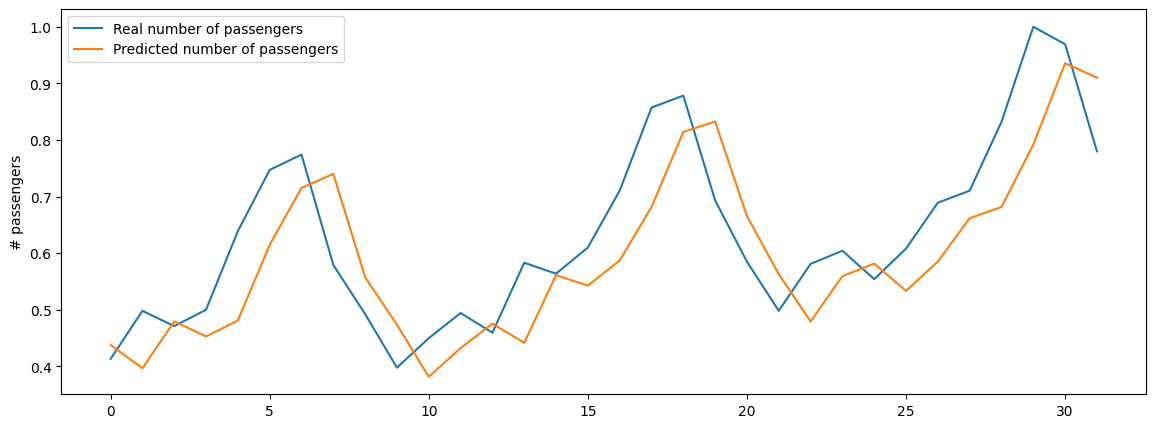

In [125]:
plt.figure(figsize=(14,5))
plt.plot(y_test, label = 'Real number of passengers')
plt.plot(y_pred1, label = 'Predicted number of passengers')
plt.ylabel('# passengers')
plt.legend()
plt.show()


In [113]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred1)

0.010145196258796391

In [114]:
model=Sequential()
model.add(SimpleRNN(5, input_shape=(1, lookback)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

d:\app\python\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [115]:
model.fit(X_train, y_train, epochs=50, batch_size=1)
y_pred2=model.predict(X_test)


Epoch 1/50


106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0786  
Epoch 2/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0239
Epoch 3/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0135
Epoch 4/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0094
Epoch 5/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0089
Epoch 6/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0067
Epoch 7/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0035
Epoch 8/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0037
Epoch 9/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0026   
Epoch 10/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0026
Epoch 11/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0024   
Epoch 12/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0024
Epoch 13/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0028
Epoch 14/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0022
Epoch 15/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss:

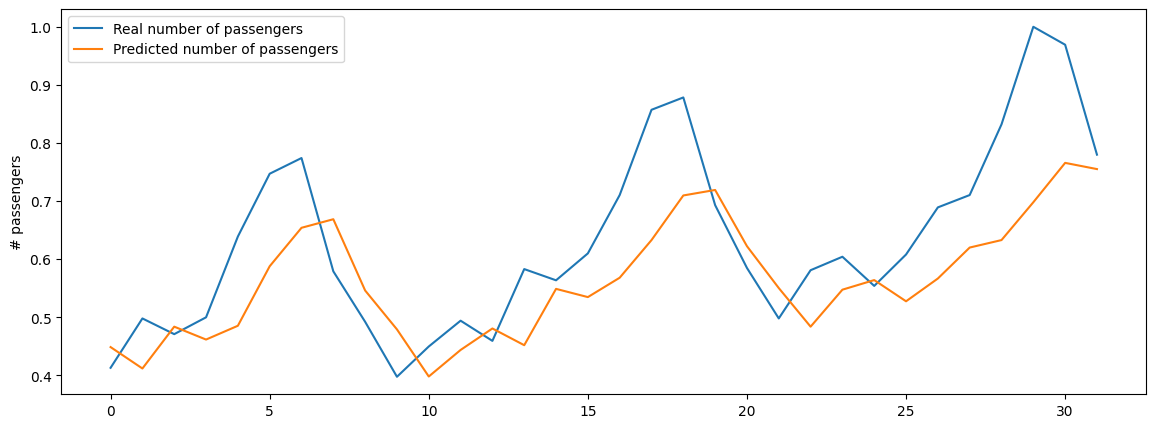

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(y_test, label = 'Real number of passengers')
plt.plot(y_pred2, label = 'Predicted number of passengers')
plt.ylabel('# passengers')
plt.legend()
plt.show()

In [119]:
model = Sequential()
model.add(GRU(5, input_shape=(1, lookback)))  # Sử dụng GRU
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

d:\app\python\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [120]:
model.fit(X_train, y_train, epochs=50, batch_size=1)
y_pred3=model.predict(X_test)


Epoch 1/50


106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0802  
Epoch 2/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0286
Epoch 3/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0224
Epoch 4/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0148
Epoch 5/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0132
Epoch 6/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0117
Epoch 7/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0108
Epoch 8/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0067
Epoch 9/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0066  
Epoch 10/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0065   
Epoch 11/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0055
Epoch 12/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0039
Epoch 13/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0036
Epoch 14/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0033   
Epoch 15/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - los

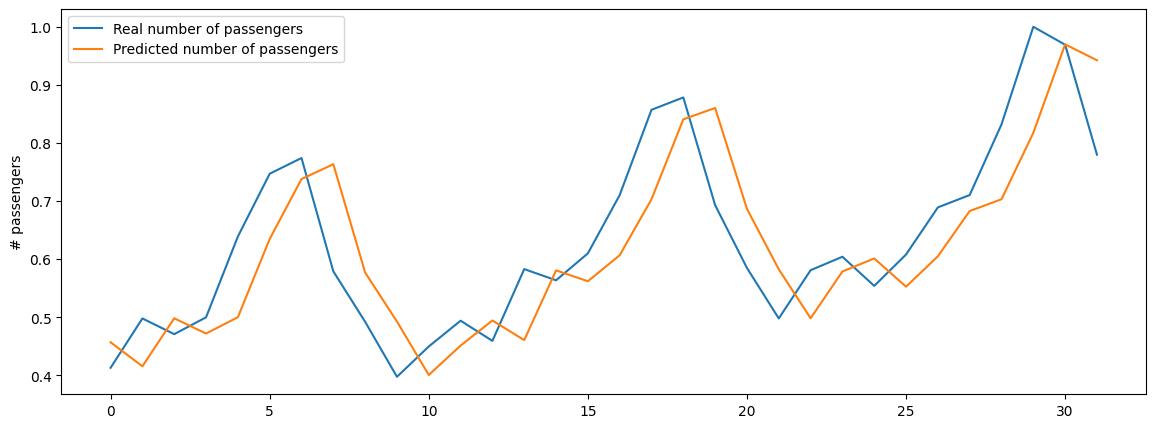

In [123]:
plt.figure(figsize=(14,5))
plt.plot(y_test, label = 'Real number of passengers')
plt.plot(y_pred3, label = 'Predicted number of passengers')
plt.ylabel('# passengers')
plt.legend()
plt.show()

